In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [552]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/NESTLEIND.csv")

In [553]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-01-08,NESTLEIND,EQ,2512.95,2555.00,2575.0,2475.20,2476.0,2494.65,2529.81,648,1.639316e+11,NaN,438,0.6759
1,2010-01-11,NESTLEIND,EQ,2494.65,2401.00,2515.0,2400.00,2500.0,2498.95,2494.44,825,2.057909e+11,NaN,638,0.7733
2,2010-01-12,NESTLEIND,EQ,2498.95,2540.00,2540.0,2471.35,2505.0,2502.85,2485.22,68346,1.698549e+13,NaN,67695,0.9905
3,2010-01-13,NESTLEIND,EQ,2502.85,2502.85,2540.0,2480.00,2489.8,2489.35,2491.94,1032,2.571682e+11,NaN,718,0.6957
4,2010-01-14,NESTLEIND,EQ,2489.35,2535.00,2595.0,2470.00,2560.0,2568.20,2510.27,330361,8.292956e+13,NaN,329193,0.9965


In [554]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2806 non-null   object 
 1   Symbol              2806 non-null   object 
 2   Series              2806 non-null   object 
 3   Prev Close          2806 non-null   float64
 4   Open                2806 non-null   float64
 5   High                2806 non-null   float64
 6   Low                 2806 non-null   float64
 7   Last                2806 non-null   float64
 8   Close               2806 non-null   float64
 9   VWAP                2806 non-null   float64
 10  Volume              2806 non-null   int64  
 11  Turnover            2806 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  2806 non-null   int64  
 14  %Deliverble         2806 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 329.0

In [555]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2.806000e+03,2.806000e+03,2456.000000,2806.000000,2806.000000
mean,7507.122933,7518.226960,7604.765289,7425.280114,7511.272024,7512.039647,7514.318959,5.449900e+04,5.493844e+13,11043.311075,33574.361725,0.662074
std,4180.468727,4189.232067,4234.100796,4133.100645,4182.250852,4182.705331,4182.857682,6.925583e+04,9.554095e+13,12405.830784,45266.246683,0.162609
min,2489.350000,2295.000000,2515.000000,2295.000000,2476.000000,2489.350000,2485.220000,3.300000e+01,8.376445e+09,63.000000,32.000000,0.131000
25%,4641.150000,4650.000000,4700.012500,4600.000000,4642.250000,4644.025000,4646.602500,1.670675e+04,8.197608e+12,3400.000000,10789.500000,0.548025
50%,6120.975000,6118.275000,6200.000000,6036.000000,6117.050000,6122.550000,6124.270000,3.285500e+04,1.942007e+13,6352.000000,22019.000000,0.665350
75%,9678.700000,9697.500000,9798.500000,9569.687500,9681.512500,9683.412500,9684.360000,6.691725e+04,5.788988e+13,14116.500000,41911.500000,0.783675
max,18732.700000,18844.000000,18844.000000,18520.000000,18720.000000,18732.700000,18683.520000,1.106746e+06,1.979044e+15,122364.000000,929598.000000,0.996500


In [556]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [557]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [558]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [559]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [560]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [561]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [562]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
2801,1.388351,0.425917,16870.60,152362,NaN
2802,1.074627,-0.710101,16779.00,44651,NaN
2803,1.325026,-0.841729,16633.80,86876,NaN
2804,1.423544,-1.057917,16502.55,80207,NaN
2805,1.932944,-1.156061,16309.25,97783,NaN


In [563]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [564]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [565]:
#Define the prediction model
model = RandomForestRegressor()

In [566]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [567]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.98265069809105


In [568]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [569]:
predictions = model.predict(X_Check)

In [570]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

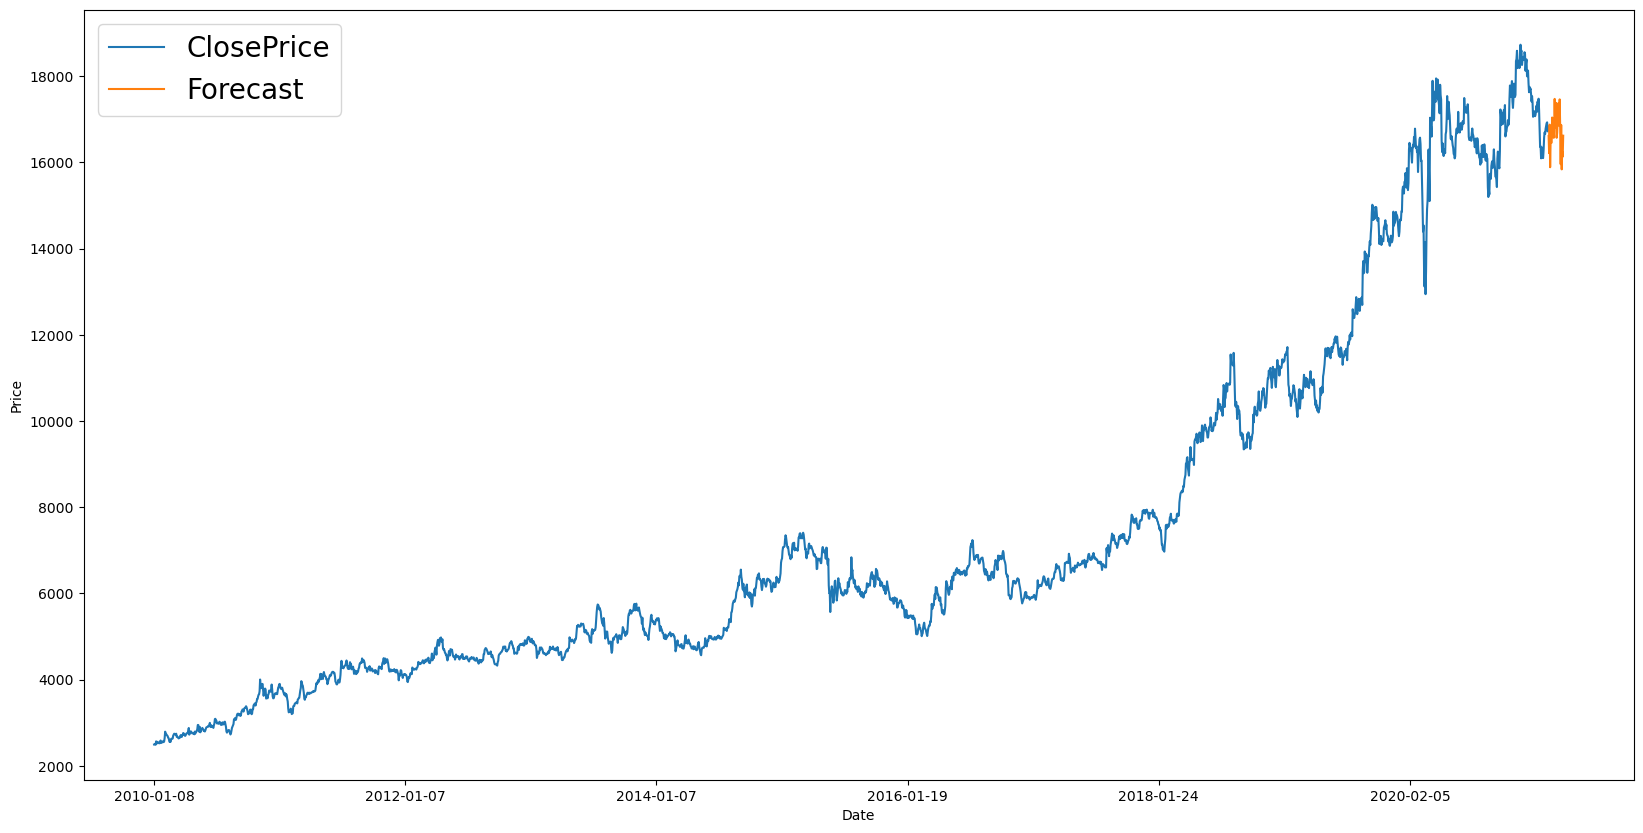

In [571]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')